In [188]:
import os
import json
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import bertopic
import matplotlib.pyplot as plt

import importlib
import std_func
importlib.reload(std_func)
# nltk.download('stopwords')
# nltk.download('wordnet')

<module 'std_func' from '/Users/richardye/OneDrive - University of Toronto/Work and Resume/Job Documents/UTSC Research Assistant/Ubineer/Workspace/std_func.py'>

 The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    

# Differences between years for companies

In [12]:
data = pd.read_csv("data/timeseries_data.csv")
filtered = data[data["reports"] > 2].sort_values(["CIK","filingDate"])
filtered

,Unnamed: 0,filingDate,reportingDate,financialEntity,coDescription,CIK,coDescription_lemmatized,coDescription_stopwords,reports
1948,1948,2016-12-06 22:05:12 UTC,2016-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”), was incorporated under ...",3545,"alico , inc. ( “ alico ” ) , wa incorporated u...",alico alico wa incorporated law state florida ...,3
1456,1456,2017-12-11 22:13:06 UTC,2017-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”) was incorporated under t...",3545,"alico , inc. ( “ alico ” ) wa incorporated und...",alico alico wa incorporated law state florida ...,3
83,83,2018-12-06 21:58:38 UTC,2018-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”) was incorporated under t...",3545,"alico , inc. ( “ alico ” ) wa incorporated und...",alico alico wa incorporated law state florida ...,3
832,832,2016-05-25 20:19:47 UTC,2016-04-01,financialEntities/params;cik=4457,we are north america’s largest “do-it-yourself...,4457,we are north america ’ s largest “ do-it-yours...,north america largest moving storage operator ...,3
1242,1242,2017-05-24 20:07:02 UTC,2017-04-01,financialEntities/params;cik=4457,we are north america’s largest “do-it-yourself...,4457,we are north america ’ s largest “ do-it-yours...,north america largest moving storage operator ...,3
...,...,...,...,...,...,...,...,...,...
1531,1531,2017-11-29 02:25:15 UTC,2017-10-01,financialEntities/params;cik=1666138,llowing discussion of our business contains fo...,1666138,llowing discussion of our business contains fo...,llowing discussion business contains statement...,3
481,481,2018-11-28 01:38:36 UTC,2018-10-01,financialEntities/params;cik=1666138,llowing discussion of our business contains fo...,1666138,llowing discussion of our business contains fo...,llowing discussion business contains statement...,3
963,963,2016-12-19 14:14:40 UTC,2016-10-01,financialEntities/params;cik=1674910,generalvalvoline inc. is a kentucky corporatio...,1674910,generalvalvoline inc. is a kentucky corporatio...,generalvalvoline kentucky corporation principa...,3
1760,1760,2017-11-17 17:10:16 UTC,2017-10-01,financialEntities/params;cik=1674910,"generalvalvoline inc., a kentucky corporation,...",1674910,"generalvalvoline inc. , a kentucky corporation...",generalvalvoline kentucky corporation worldwid...,3


In [16]:
print("There are {} unique companies".format(filtered.groupby("CIK").size().shape[0]))

There are 564 unique companies


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

for i in filtered.loc[:,"CIK"].unique():
    company = filtered[filtered["CIK"] == i].sort_values("filingDate")
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    X.to

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
company = filtered.sort_values(["CIK","filingDate"]) #[filtered["CIK"] == 3545].sort_values("filingDate")
# print(company)
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=1000)
X = vectorizer.fit_transform(company.loc[:, "coDescription_stopwords"]).toarray().astype(int)
diff = pd.DataFrame(X[1:,:] - X[:-1,:],
                    columns = vectorizer.get_feature_names_out()) \
        # .merge(pd.Series(company.loc[:,"CIK"], name = "CIK"), how = "left", on = "CIK")
        # .sort_values(0, axis = 1,  ascending = False)
diff
# diff.set_axis(['Year 1 to Year 2', 'Year 2 to Year 3'], axis='index')

,ability,able,access,accessory,accordance,according,account,accounted,accounting,accrued,...,work,working,world,worldwide,would,written,year,year ended,year ended september,york
0,1,0,0,0,0,0,-1,0,-3,0,...,1,3,0,0,-1,0,0,-2,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,8,1,1,0
2,0,-1,4,4,0,0,1,0,-2,0,...,-2,-1,1,0,0,1,-31,-11,-11,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,1,0,1,0,0,0,3,2,0,0,...,2,1,3,3,0,0,3,0,0,1
1689,2,0,0,0,0,0,-1,0,1,1,...,-1,1,-2,0,0,0,3,1,1,0


In [122]:
total_diff = diff[(diff.reset_index().index+1) % 3 != 0]
total_diff

,ability,able,access,accessory,accordance,according,account,accounted,accounting,accrued,...,work,working,world,worldwide,would,written,year,year ended,year ended september,york
0,1,0,0,0,0,0,-1,0,-3,0,...,1,3,0,0,-1,0,0,-2,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,8,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2,0,0,0,0,-1,0,0,...,0,0,-2,0,0,0,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,-10,-8,1,0,-6,4,-34,3,-2,-4,...,2,-11,-2,6,-46,-3,0,2,0,0
1686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,2,0,0,0,0,0,-1,0,1,1,...,-1,1,-2,0,0,0,3,1,1,0


In [123]:
y1_to_y2 = total_diff.iloc[::2, :]#[total_diff.index % 2 == 1]
y1_to_y2

,ability,able,access,accessory,accordance,according,account,accounted,accounting,accrued,...,work,working,world,worldwide,would,written,year,year ended,year ended september,york
0,1,0,0,0,0,0,-1,0,-3,0,...,1,3,0,0,-1,0,0,-2,-1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2,0,0,0,0,-1,0,0,...,0,0,-2,0,0,0,-1,-1,0,0
9,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,-1,-1,0,0,0,0,9,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,-1,0,0,0,1,0,...,-2,-1,-1,1,0,0,0,0,0,0
1680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,3,0,1,0,0,0,3,0,0,0,...,0,-3,2,0,0,0,-3,0,0,0
1686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
y2_to_y3 = total_diff.iloc[1::2, :]#[total_diff.index % 2 == 0]
y2_to_y3

,ability,able,access,accessory,accordance,according,account,accounted,accounting,accrued,...,work,working,world,worldwide,would,written,year,year ended,year ended september,york
1,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,8,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,-1,0,0,-2,0,0,0
10,0,0,2,-1,0,0,-1,0,-1,0,...,0,0,0,0,0,0,1,0,0,0
13,0,0,0,0,-2,0,0,0,0,0,...,0,0,0,0,-1,0,-3,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-4,0,0,0
1681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,-10,-8,1,0,-6,4,-34,3,-2,-4,...,2,-11,-2,6,-46,-3,0,2,0,0
1687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
pd.DataFrame(filtered.sort_values(["CIK","filingDate"]).loc[:,"CIK"].unique()).iloc[:,0]

0         3545
1         4457
2         6281
3         6885
4         7623
        ...   
559    1660690
560    1663641
561    1665300
562    1666138
563    1674910
Name: 0, Length: 564, dtype: int64

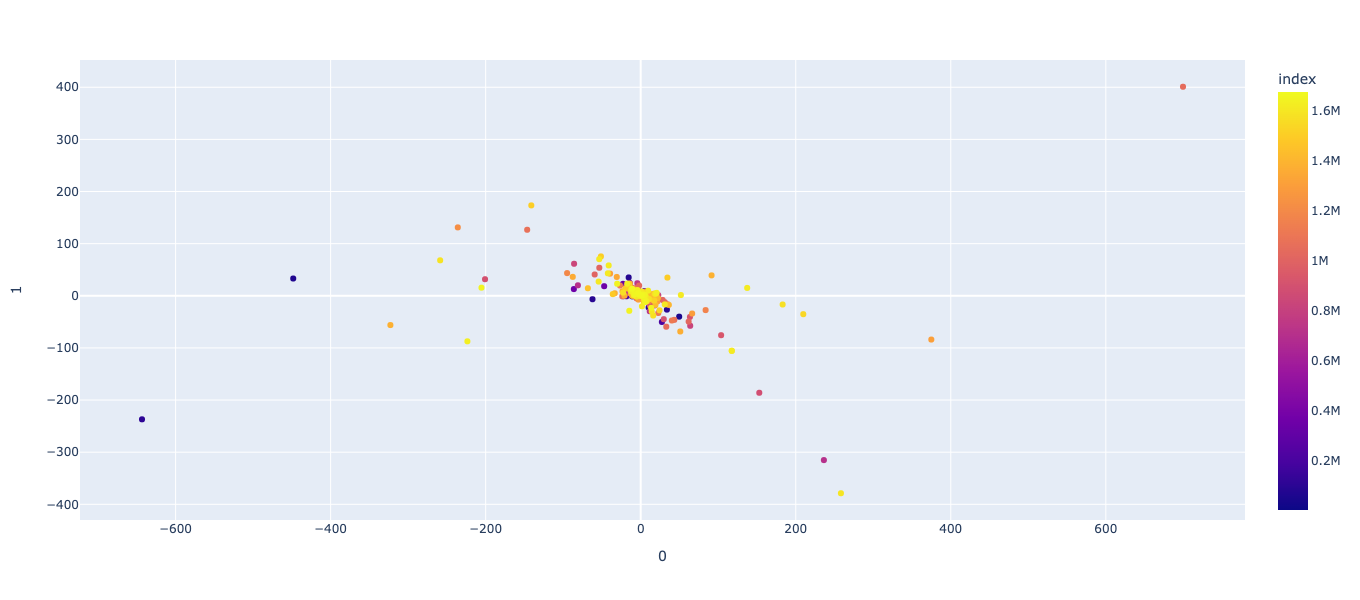

In [192]:
plt_12 = std_func.pca_visualize_2d(pd.DataFrame(y1_to_y2), pd.DataFrame(filtered.sort_values(["CIK","filingDate"]).loc[:,"CIK"].unique()))

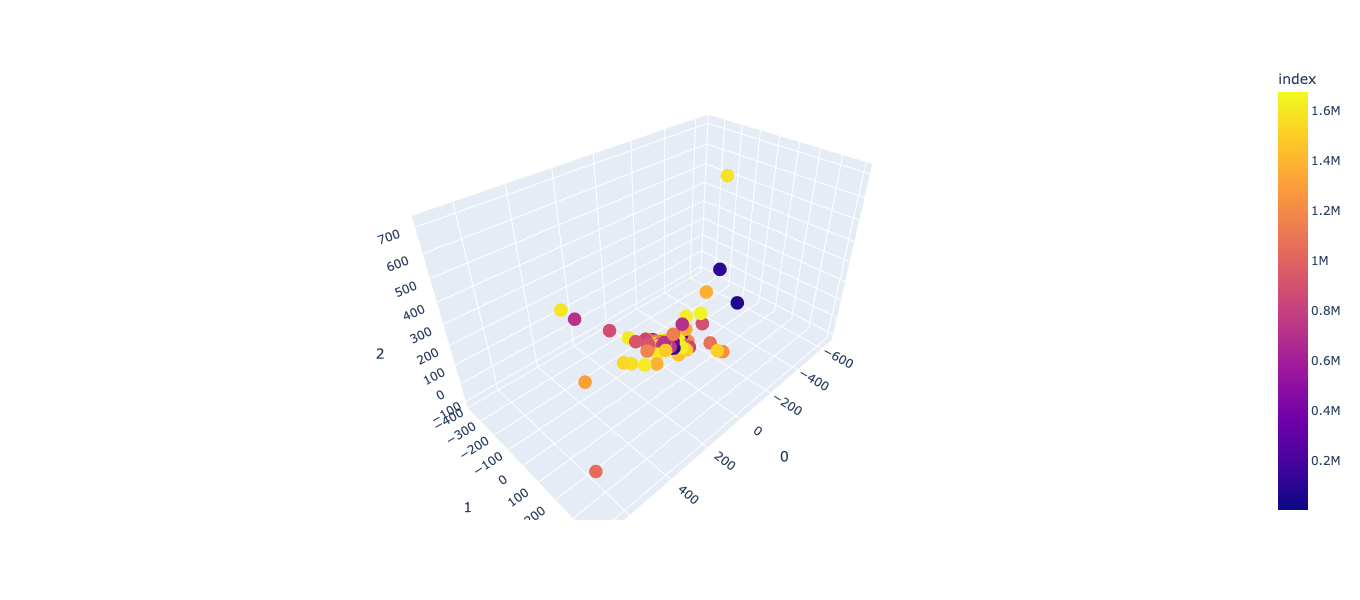

In [193]:
std_func.pca_visualize_3d(plt_12)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

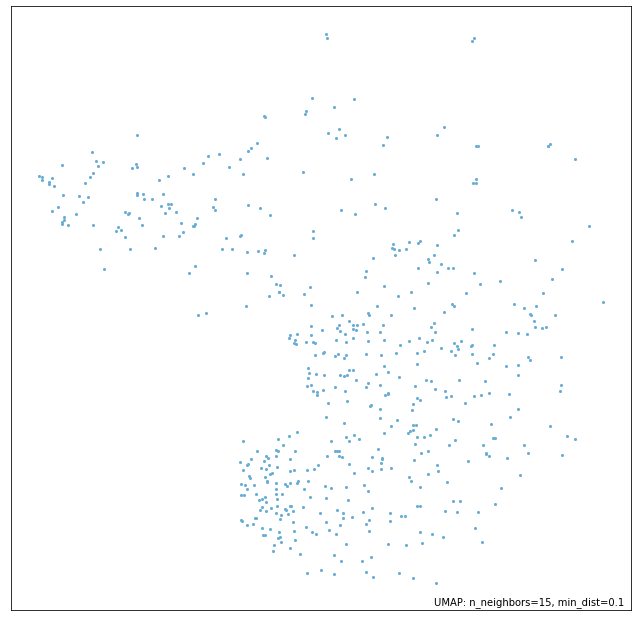

In [168]:
import umap
import umap.plot
mapper1 = umap.UMAP().fit(pd.DataFrame(y1_to_y2))
umap.plot.points(mapper1) #, labels=pd.DataFrame(filtered.sort_values(["CIK","filingDate"]).loc[:,"CIK"].unique()).iloc[:,0])

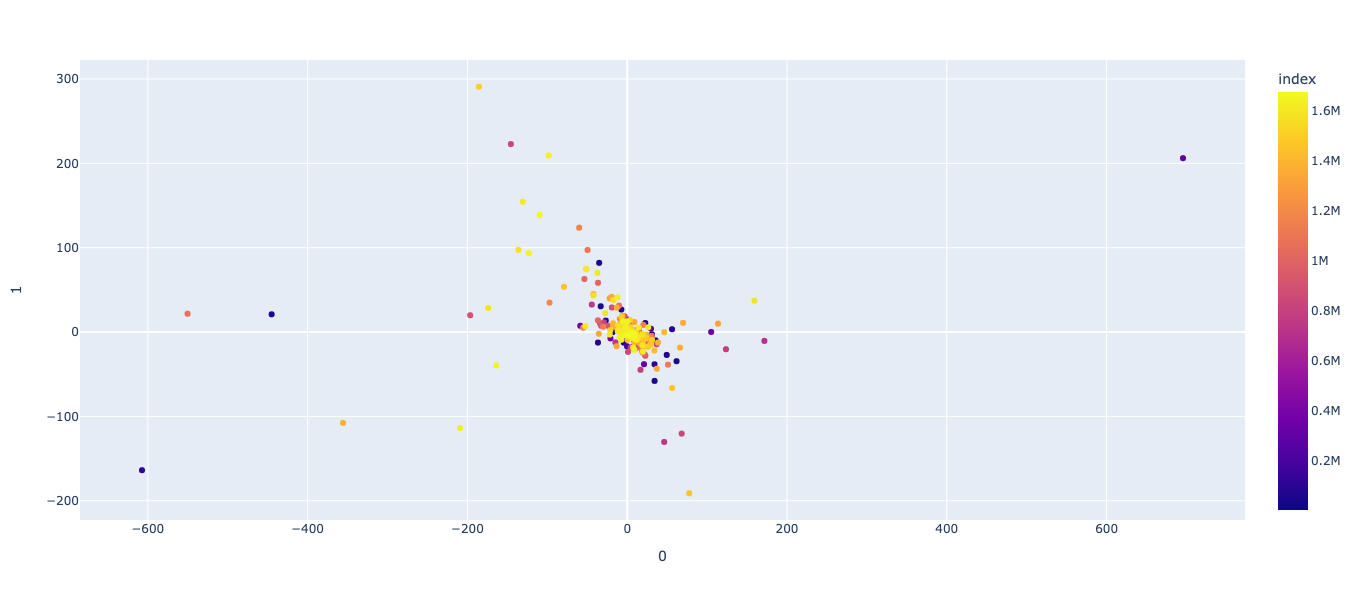

In [171]:
plt_23 = std_func.pca_visualize_2d(pd.DataFrame(y2_to_y3), pd.DataFrame(filtered.sort_values(["CIK","filingDate"]).loc[:,"CIK"].unique()))

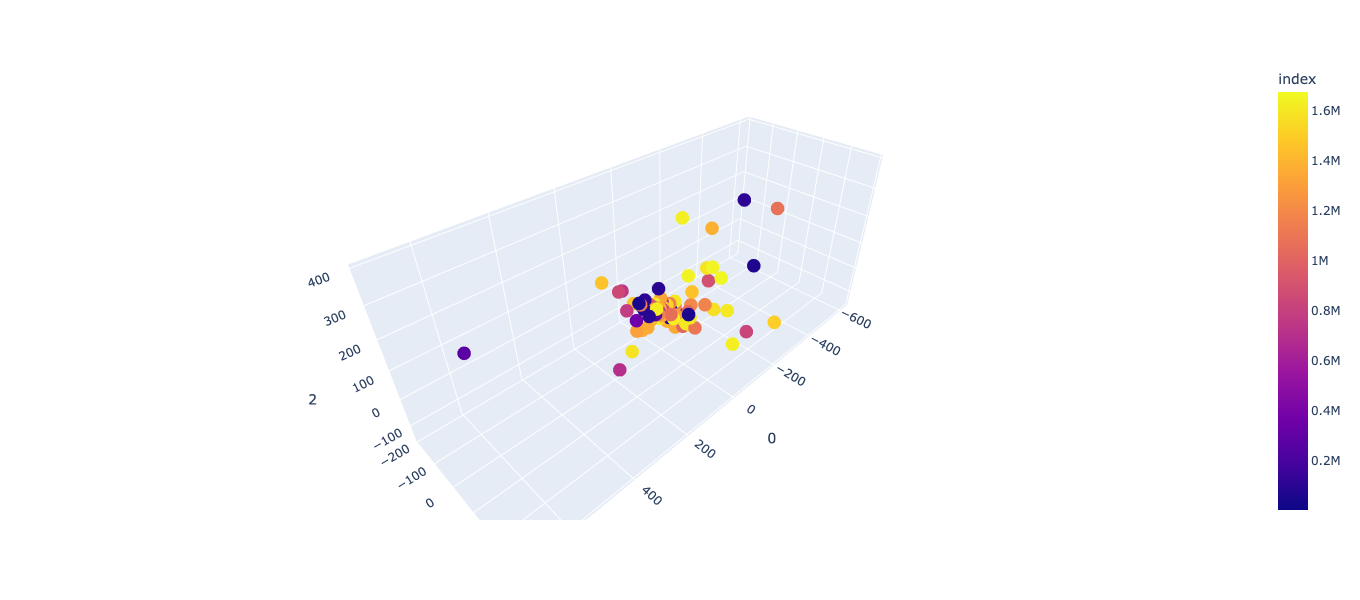

In [189]:
std_func.pca_visualize_3d(plt_23)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

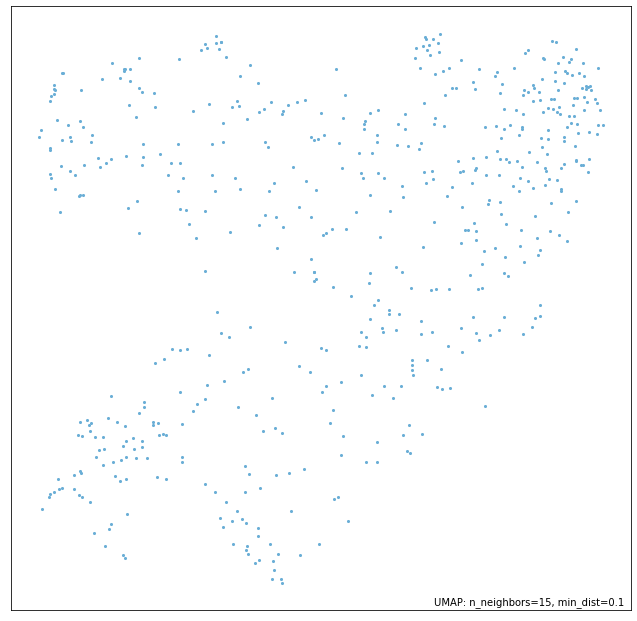

In [170]:
mapper2 = umap.UMAP().fit(pd.DataFrame(y2_to_y3))
umap.plot.points(mapper2) #, labels=pd.DataFrame(filtered.sort_values(["CIK","filingDate"]).loc[:,"CIK"].unique()).iloc[:,0])

THe interpretation of these results:

UMAP is like T-SNE in that it perserves local neighbourhoods sacrificing relation to any dimension. This means points that are close together in an n-dimensional space will stay close together in a UMAP plot. 

This point should describe companies who added/subtracted similar words from year 2 to year 3.

In [94]:
diff.iloc[0,:10].index.tolist()

['alico',
 'program',
 'water',
 'project',
 'citrus',
 'ranch',
 'grove',
 'ha',
 'cost',
 'contract']

In [95]:
diff.iloc[0,-10:].index.tolist()

['company',
 'common',
 'condition',
 'combined',
 'silver',
 'result',
 'nip',
 'financial',
 'orange',
 'september']